# Explorando los datos SWOT

In [1]:
import matplotlib
from matplotlib import pyplot as plt 
import matplotlib.gridspec as gridspec

import glob
import xarray as xr
import numpy as np
# import GriddedData

import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
# https://docs.xarray.dev/en/stable/gallery.html
import datetime
import json
from erddapy import ERDDAP

In [2]:
dire = '/home/jovyan/shared/proyecto2/datos_SWOT/fast_Med/'

In [3]:
!ls /home/jovyan/shared/proyecto2/datos_SWOT/fast_Med/

eNAtl60_wT_wmed_hourly_ASO_fast_c01_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c01_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c02_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c02_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c03_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c03_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c04_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c04_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c05_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c05_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c06_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c06_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c07_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c07_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c08_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c08_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c09_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c09_p022.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c10_p009.nc
eNAtl60_wT_wmed_hourly_ASO_fast_c10_p022.nc


# Explorando un unico fichero:

In [4]:
ds_c01_p009 = xr.open_dataset(dire + 'eNAtl60_wT_wmed_hourly_ASO_fast_c01_p009.nc')

In [5]:
ds_c01_p009

<xarray.Dataset>
Dimensions:                        (time: 2650, nC: 52, n2: 2)
Dimensions without coordinates: time, nC, n2
Data variables: (12/31)
    time_sec                       (time) float64 ...
    lon_nadir                      (time) float64 ...
    lat_nadir                      (time) float64 ...
    lon                            (time, nC) float64 ...
    lat                            (time, nC) float64 ...
    x_al                           (time) float32 ...
    ...                             ...
    roll_err                       (time, nC) float64 ...
    phase_err                      (time, nC) float64 ...
    ssh_model                      (time, nC) float64 ...
    pd_err_2b                      (time, nC) float64 ...
    bd_err                         (time, nC) float64 ...
    karin_err                      (time, nC) float64 ...
Attributes: (12/26)
    description:               SWOT fixed grid
    corresponding_grid:        /mnt/meom/workdir/gomeznl/git/swotsimulator/sw...
    title:                     SWOT-like data simulated by SWOT simulator
    keywords:                  SWOT, altimetry, SSH, satellite, remote sensing
    Conventions:               CF-1.6
    summary:                   SWOT grid data produced
    ...                        ...
    geospatial_lon_units:      degrees_east
    project:                   SWOT
    date_created:              2019-08-20T12:52:44Z
    date_modified:             2019-08-20T12:52:44Z
    keywords_vocabulary:       NASA
    references:                Gaultier, L., C. Ubelmann, and L.-L. Fu, 2016:...

De estas variables solo nos interesa lon, lat y ssh_model (los datos interpolados a la malla del satelite)

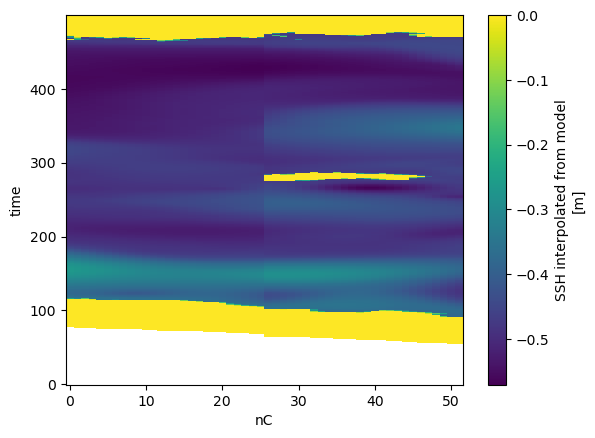

In [6]:
ds_c01_p009.ssh_model[2000:2500,:].plot()

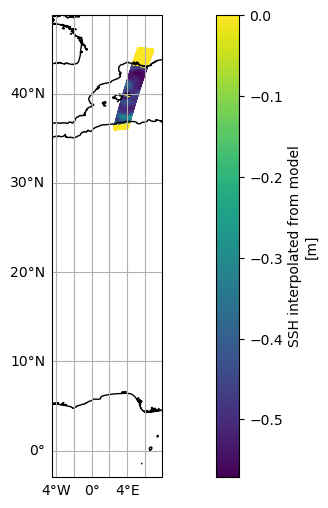

In [10]:
plt.figure(figsize=(14,6)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ds_c01_p009.plot.scatter(x="lon", y="lat", hue="ssh_model", s=2, ax=ax1, transform=ccrs.PlateCarree())
# air.plot.contourf(ax=ax)
ax1.coastlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


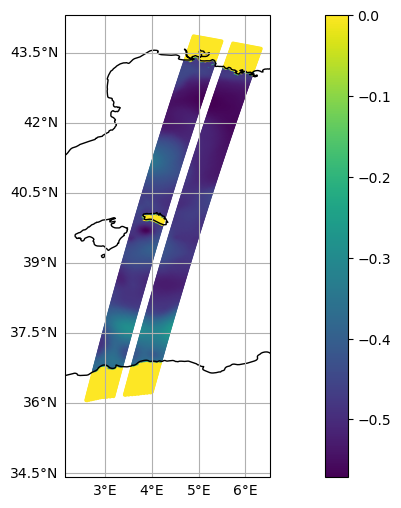

In [9]:
plt.figure(figsize=(14,6)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
plt.scatter(ds_c01_p009.lon[2000:2500,:], ds_c01_p009.lat[2000:2500,:], c=ds_c01_p009.ssh_model[2000:2500,:], s=2, transform=ccrs.PlateCarree())
# air.plot.contourf(ax=ax)
ax1.coastlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.colorbar()